In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
system_dialog_prototype_comparison = pd.read_csv("translations_scores/system_dialog_prototype_experiments.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


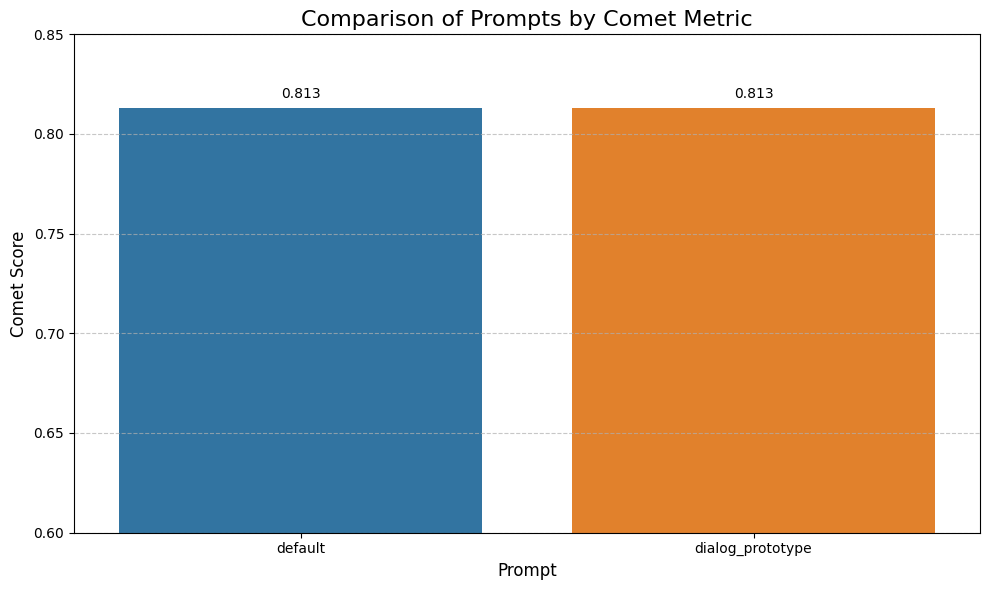

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


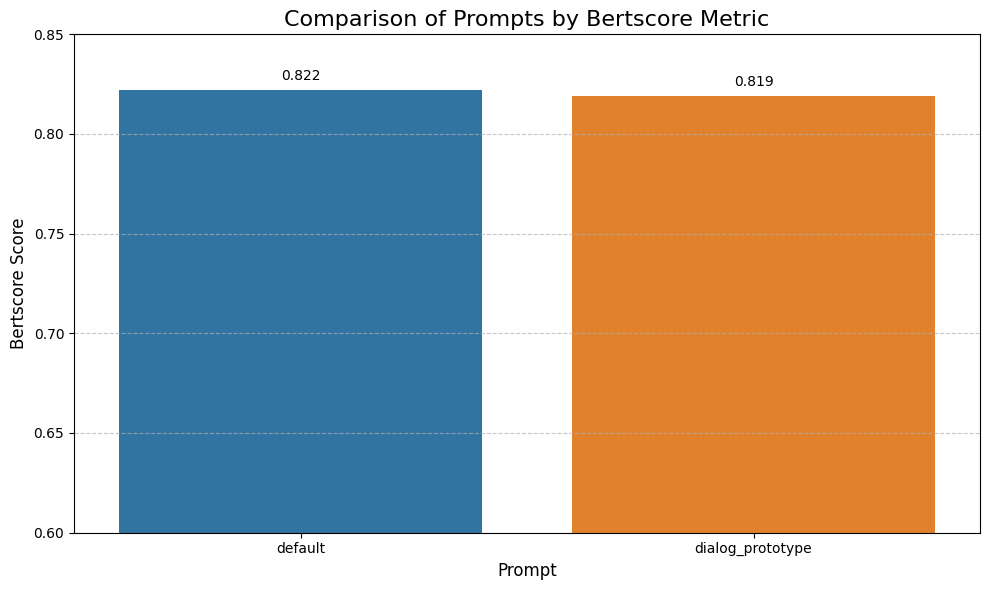

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


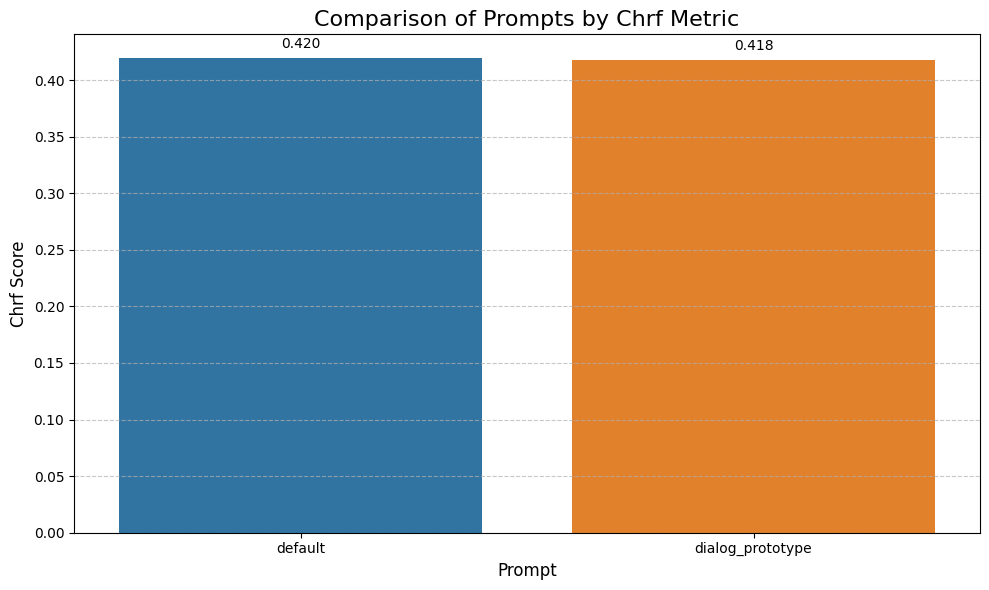

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\2844582713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


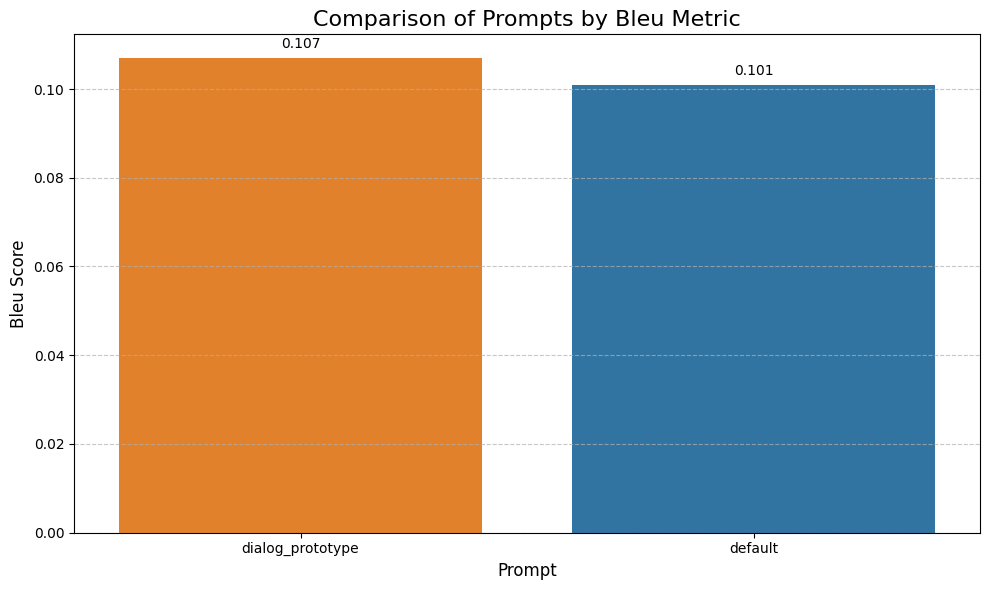

In [12]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparison.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparison.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparison[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [13]:
dialog_prototype_comparison = pd.read_csv("translations_scores/dialog_prototype_experiments.csv")

In [14]:
sorted_df = dialog_prototype_comparison.sort_values(by='comet_default', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_default', 'default', 'dialog_prototype', 'en_text', 'pl_text']]
result

,comet_default,default,dialog_prototype,en_text,pl_text
1107,0.244561,"Cholera jasna, leje.","Cholera, ale leje!","Blast it all, it's pourin'.","W dupę jeża, ale chlupa."
1529,0.278968,Cholera jasna.,Cholera jasna.,Bloody hell.,Kurwa mać.
824,0.299936,"Dubhenn w cieniu, światło w mroku.","Światło, które przecina ciemności, blask, któr...","Dubhenn haern am glâdeal, morc'h am fhean aiesin.","„Dubhenn haern am glâdeal, morc’h am fhean aie..."
1266,0.319714,Wypija chciwymi haustami.,Wypija je chciwymi haustami.,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
1136,0.338975,Umblest regards.\n\nNie otrzymałem żadnego tek...,Niech cię Bóg błogosławi.,Umblest regards.,"A kłaniam się, kłaniam."
124,0.339109,Troll bang-bang. W głowie.,Uderzam w głowę trolla.,Bang-bang troll. In noggin.,Coś mnie kuje. We łbie.
963,0.341954,"Trzydziestu trzech złodziei myślało, że będą b...","Trzydziestu trzech złodziei myślało, że będą r...",The thirty-three thieves thought they thrilled...,"Szelestnym szemrzą brzozy szeptem, ha!?"
1774,0.348426,"Poparzone dłonie, może... ale przebite?","Poparzone ręce, może... ale przebite?","Singed hands, maybe… but impaled?",Sparzyć... Nie spłonąć.
812,0.359281,Dalej z tym - chwyć cipę.,Bierz ją - chwytaj kurwę.,On with it - grab the cunt.,Gońcie sukę.
1225,0.359348,Troll nie chce walić-walić.,Nie chcę być uderzany - uderzany - chcę mieć p...,Troll no thwacky-thwack wanna.,Nie lubię agresja.


In [15]:
sorted_df = dialog_prototype_comparison.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_dialog_prototype','dialog_prototype', 'default', 'en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,default,en_text,pl_text
1529,0.278968,Cholera jasna.,Cholera jasna.,Bloody hell.,Kurwa mać.
1700,0.299377,Nie zatrzymam się na jego lasce.,"Lód... to zaklęcie. Musisz znaleźć maga, który...",The ice… it's a spell. You must find the mage ...,Ten lód... To zaklęcie. Musisz zniszczyć kostu...
824,0.314195,"Światło, które przecina ciemności, blask, któr...","Dubhenn w cieniu, światło w mroku.","Dubhenn haern am glâdeal, morc'h am fhean aiesin.","„Dubhenn haern am glâdeal, morc’h am fhean aie..."
842,0.337425,"Tak. O mniej więcej tyle, co by mi brakowało n...","Mhm. Mniej więcej tyle, co bym tęsknił za noże...",Mhm. About as much as I'd miss a knife in my k...,Mhm. Jak gwoździ w kalesonach.
1774,0.344469,"Poparzone ręce, może... ale przebite?","Poparzone dłonie, może... ale przebite?","Singed hands, maybe… but impaled?",Sparzyć... Nie spłonąć.
1266,0.346602,Wypija je chciwymi haustami.,Wypija chciwymi haustami.,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
1107,0.347590,"Cholera, ale leje!","Cholera jasna, leje.","Blast it all, it's pourin'.","W dupę jeża, ale chlupa."
1893,0.350304,Cóż... Kawałki niestrawionego jedzenia. Kilka ...,No? Coś ciekawego?,So? Anything interesting?,No i jak? Coś ciekawego?
826,0.366266,"Pamiętam... Choć sama podziwiałam to, co miała...",Przepaść pod nami była zapierająca dech - szum...,Chasm below us was breathtaking - rustling tre...,"W dole była piękna przepaść, szumiały drzewa, ..."
963,0.371967,"Trzydziestu trzech złodziei myślało, że będą r...","Trzydziestu trzech złodziei myślało, że będą b...",The thirty-three thieves thought they thrilled...,"Szelestnym szemrzą brzozy szeptem, ha!?"


In [2]:
system_dialog_prototype_comparisonv2 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv2.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\3588918489.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


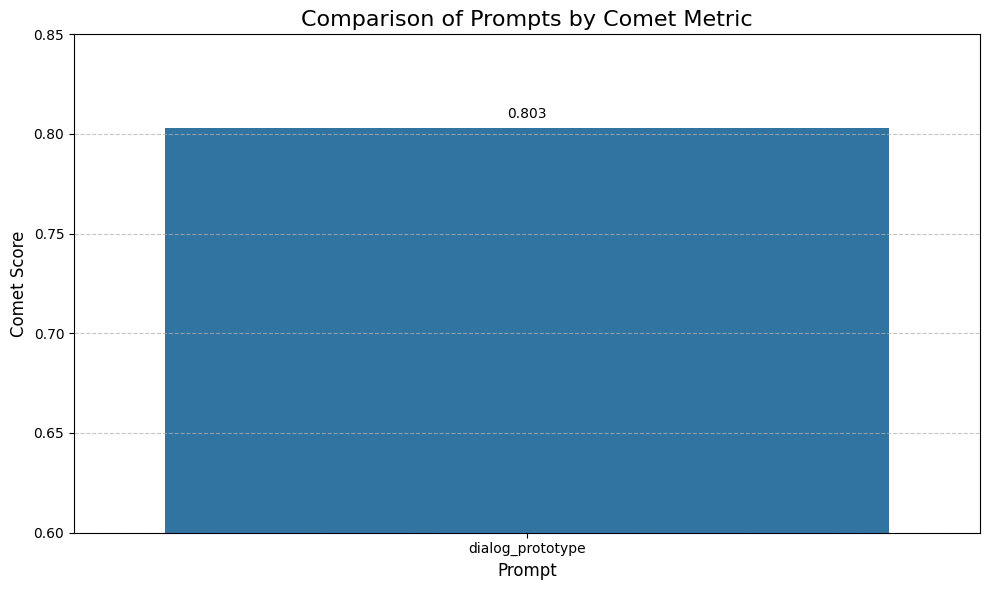

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\3588918489.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


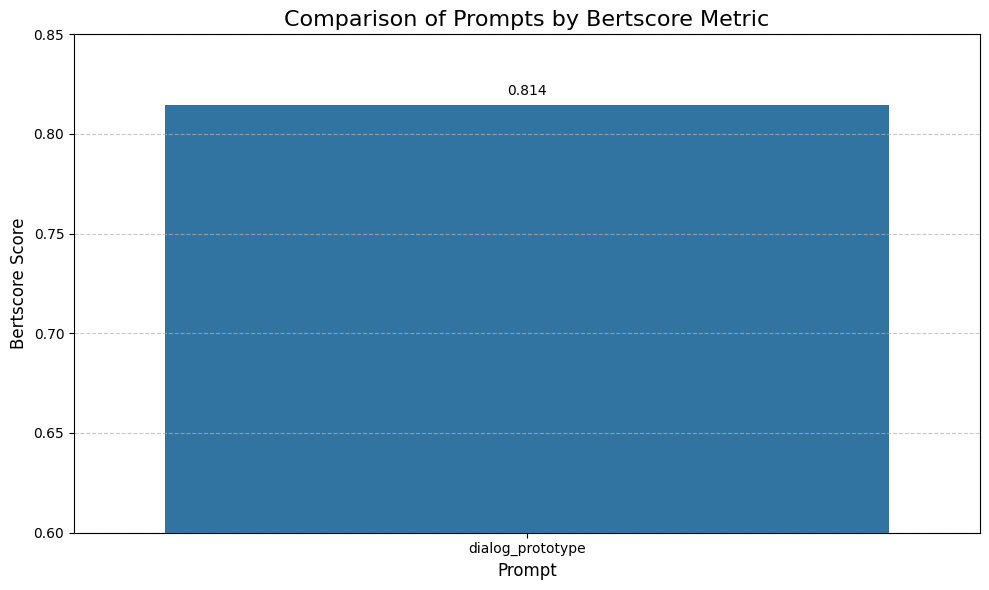

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\3588918489.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


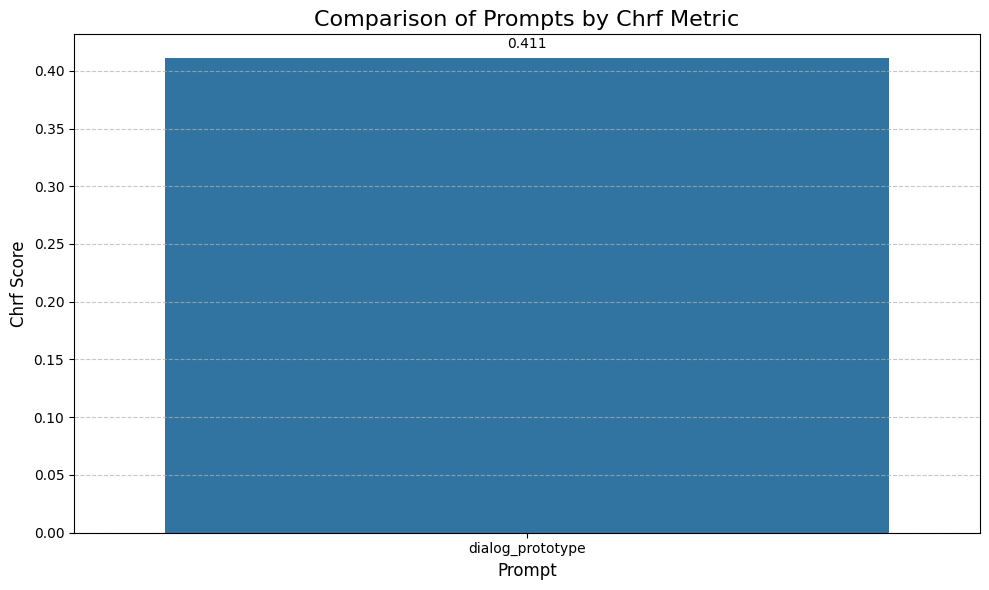

C:\Users\kajet\AppData\Local\Temp\ipykernel_13736\3588918489.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


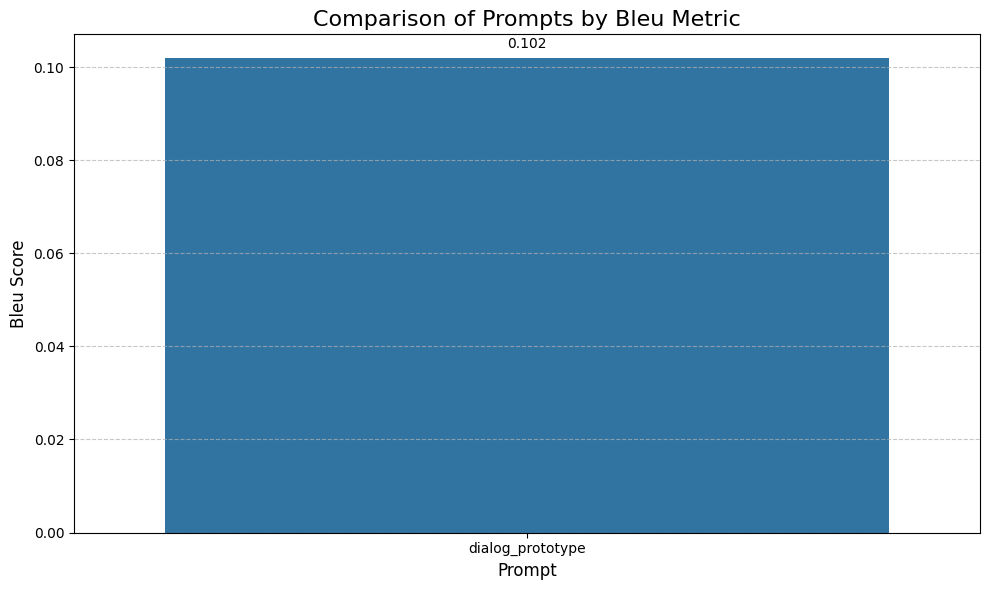

In [4]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv2.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv2.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparisonv2[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
dialog_prototype_comparisonv2 = pd.read_csv("translations_scores/dialog_prototype_experimentsv2.csv")

In [9]:
sorted_df = dialog_prototype_comparisonv2.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_dialog_prototype','dialog_prototype', 'en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
1136,0.197336,Umblest regards.,Umblest regards.,"A kłaniam się, kłaniam."
1158,0.264703,"Nie, nie, nie. Pellar nie wie.",Anna and her daughter are missing. Know where ...,"Anna i jej córka zaginęły. Wiesz, gdzie są?"
1529,0.278968,Cholera jasna.,Bloody hell.,Kurwa mać.
815,0.290313,"Poza gryfem, samo stare – nekkery, upiory, uto...",What about you?,A co u ciebie?
1172,0.311518,"Aye, you got that righteous frown on you. Defi...","Aye, you got that righteous frown on you. Defi...","Nie tknąłby, zgadza się. Zdecydowanie."
64,0.316825,A wind-born steed... A black squall turned horse…,A wind-born steed... A black squall turned horse…,Czarnego rumaka... Szkwał w postaci konia...
1392,0.321376,Niech cię diabli! Zabierz mnie stąd!,Greame et dwyr! Deagnis cair-lle ess pyr'shena...,Greame et dwyr! Deagnis cair-lle ess pyr’shena...
1774,0.322441,"Poparzone ręce, może... ale nadziane na coś?","Singed hands, maybe… but impaled?",Sparzyć... Nie spłonąć.
963,0.327504,"Trzydziestu trzech złodziei myślało, że zachwy...",The thirty-three thieves thought they thrilled...,"Szelestnym szemrzą brzozy szeptem, ha!?"
1933,0.334643,Z Triss.,"Not sure if you've heard, but… once it's all o...","Nie wiem, czy słyszałaś... Jak już będzie po w..."


In [7]:
system_dialog_prototype_comparisonv3 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv3.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_4928\1701373353.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


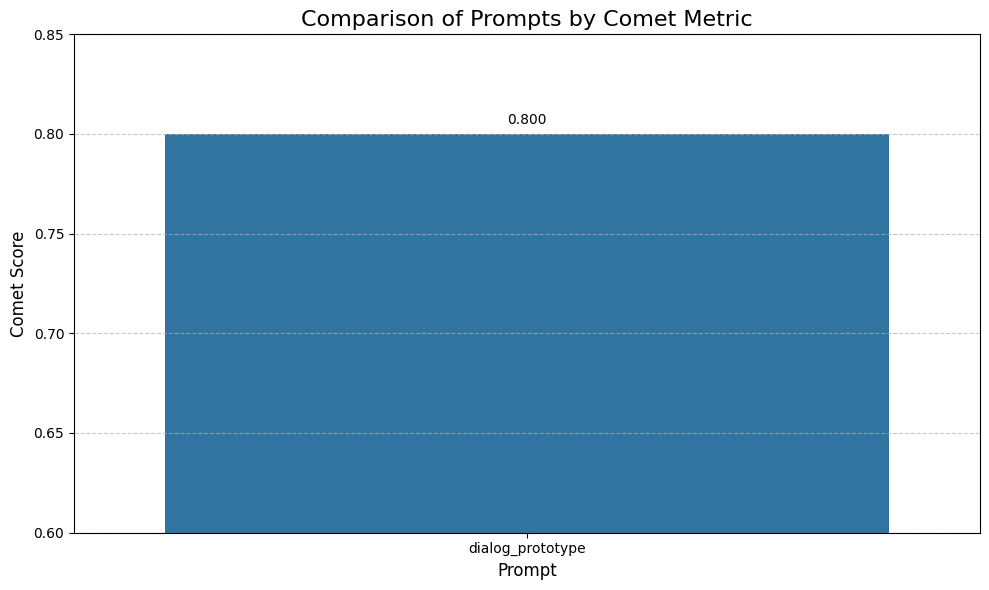

C:\Users\kajet\AppData\Local\Temp\ipykernel_4928\1701373353.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


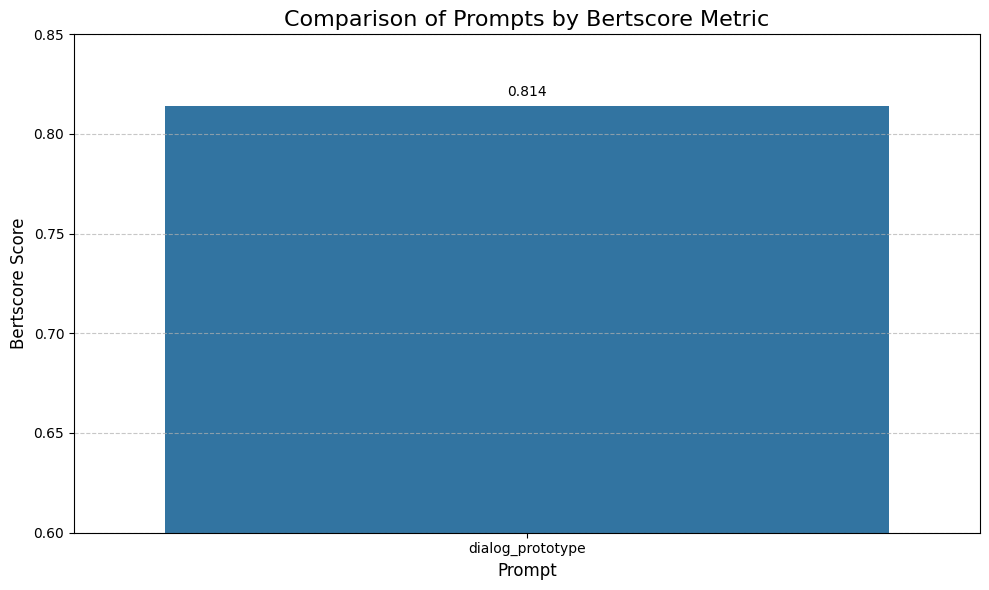

C:\Users\kajet\AppData\Local\Temp\ipykernel_4928\1701373353.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


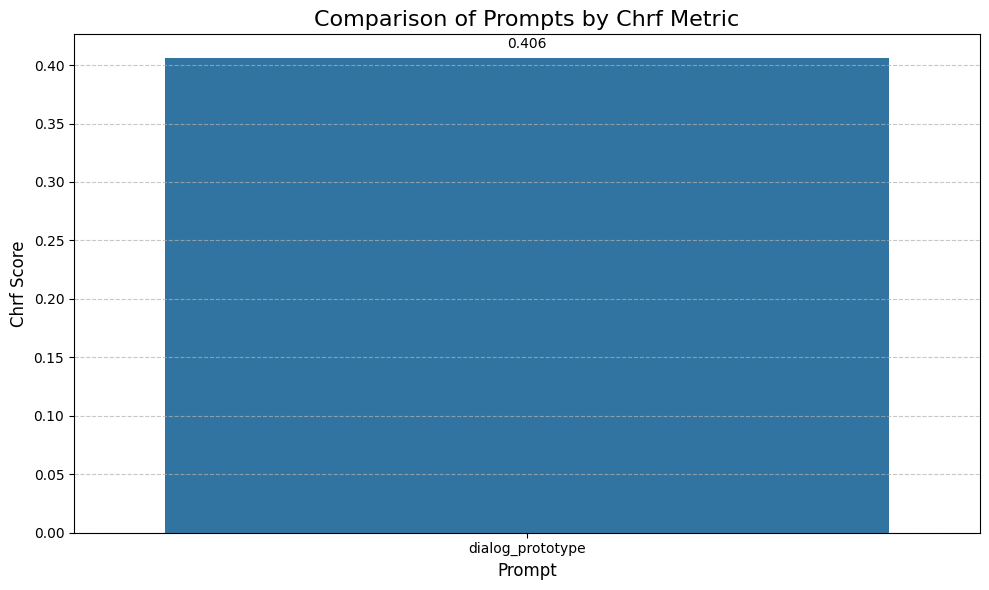

C:\Users\kajet\AppData\Local\Temp\ipykernel_4928\1701373353.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


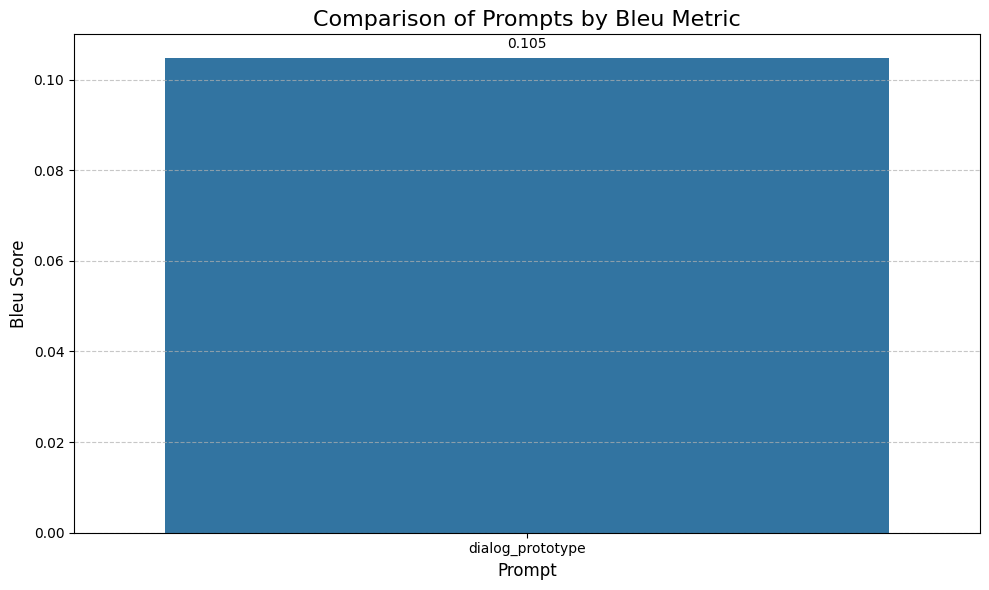

In [8]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv3.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv3.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparisonv3[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
dialog_prototype_comparisonv3 = pd.read_csv("translations_scores/dialog_prototype_experimentsv3.csv")

In [10]:
sorted_df = dialog_prototype_comparisonv3.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_dialog_prototype','dialog_prototype', 'en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
1873,0.225802,Josef's pigs got hoof-and-mouth. Must be a curse!,You deaf?,Głuchyś?
606,0.244900,directly translated,Guardsmen outside Triss' house. Not good.,Straż przy domu Triss. Niedobrze.
1842,0.256407,The wolf I will follow into the storm. To find...,The wolf I will follow into the storm. To find...,Za wilczym śladem podążę w zamieć i twoje serc...
1626,0.278461,"Ceádmil, Yennefer aep Vengerberg. Gwynbleidd.",The emperor does not ask - anyone for anything...,"Cesarz nie będzie prosił. Ani ciebie, ani niko..."
1037,0.300606,"And we've still got work to do. Oh, she'll be ...","And we've still got work to do. Oh, she'll be ...",No i trzeba skończyć robotę. To będzie naprawd...
632,0.303872,Tamta droga. Zaplątała mi się w zębach.,Thaff oth thaf way. Whorethon knothed me thoot...,Fowiewł famfędy. Fukinfyn wywił mi węwa...
941,0.314254,"Charm the lasses, not an old gran like me.","Charm the lasses, not an old gran like me.","Młodsze czaruj, a nie mnie, starą babę."
1993,0.320279,"We were lucky this time, but… you'd best leave...","Take care of yourself, Kluhg.","Uważaj na siebie, Smart."
280,0.334850,Czy owija się wokół siebie?,Hee-hee-hee! Does it loop back on itself?,"Hi, hi, hi."
618,0.337419,To nie one zaatakowały tych ludzi. Wiwerna kró...,Body's dried to a crisp. Signs of burns.,Ciało wysuszone na wiór... Ślady poparzeń...


In [3]:
system_dialog_prototype_comparisonv4 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv4.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2335350598.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


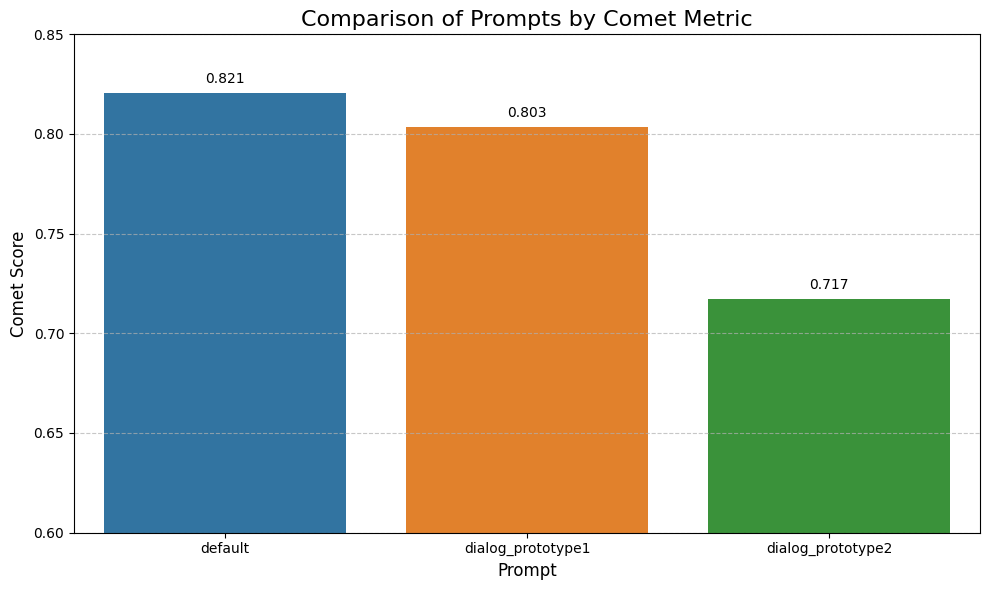

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2335350598.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


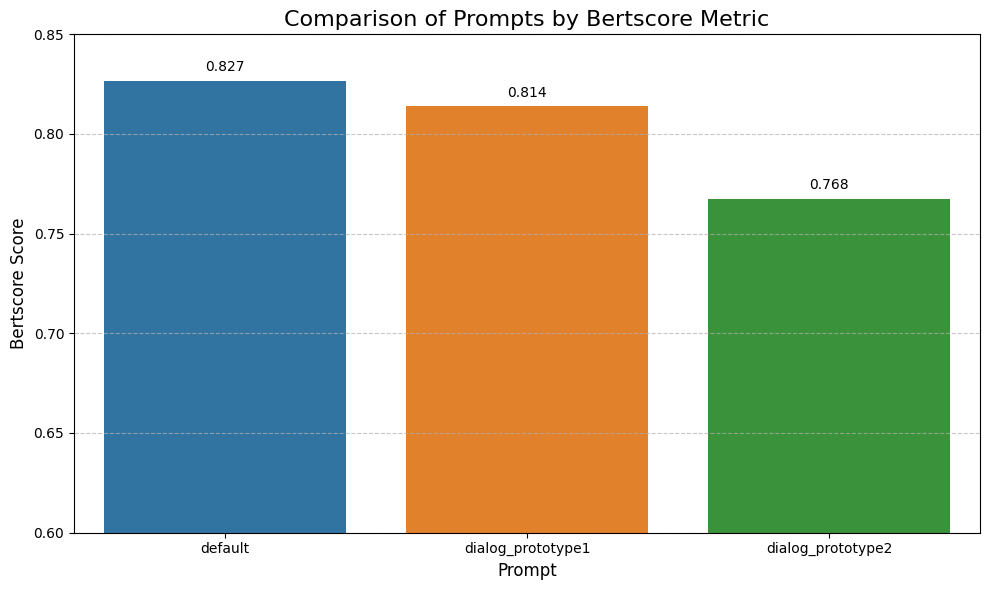

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2335350598.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


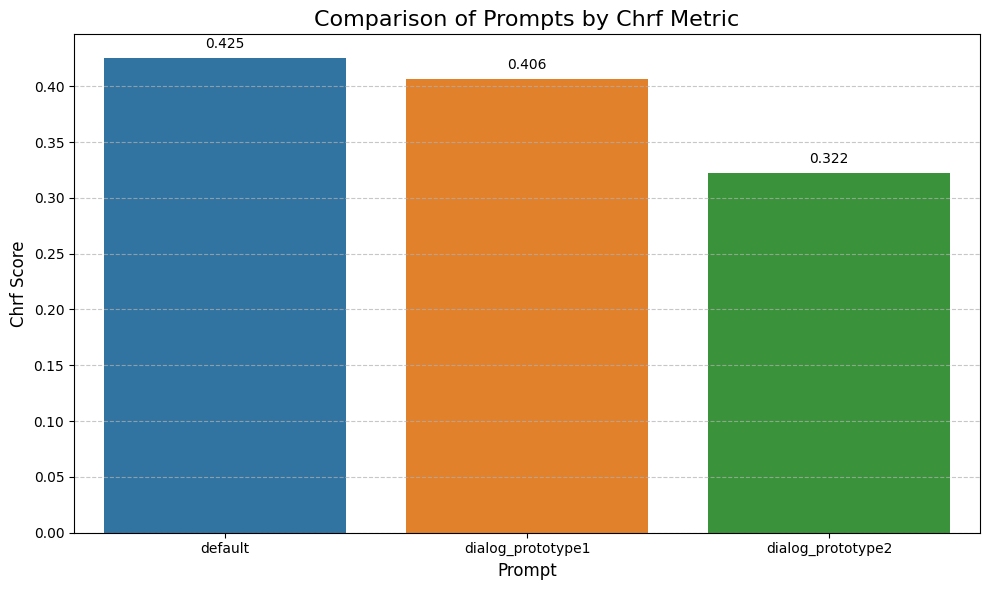

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2335350598.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


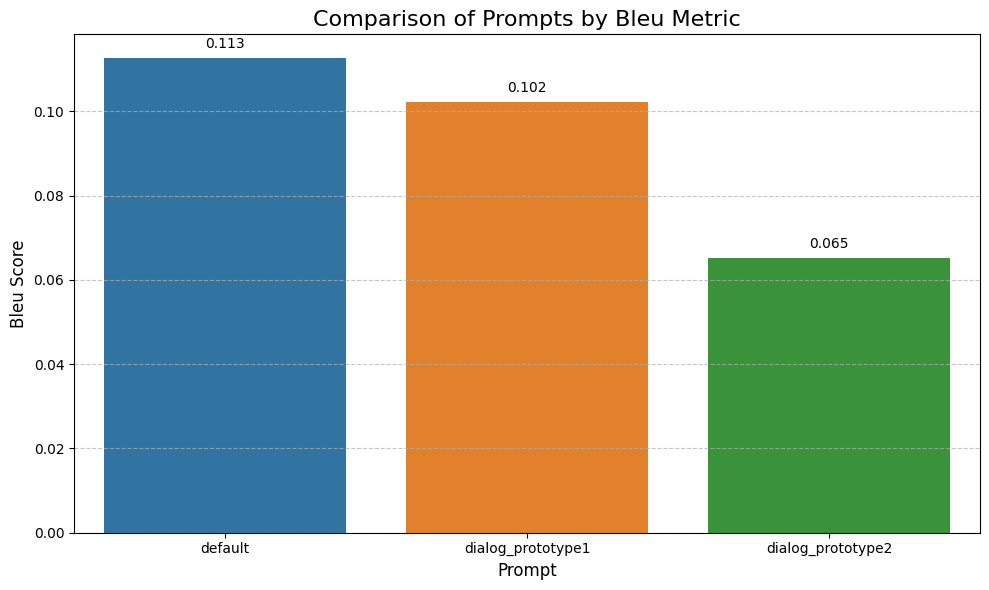

In [4]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv4.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv4.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparisonv4[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
dialog_prototype_comparisonv4 = pd.read_csv("translations_scores/dialog_prototype_experimentsv4.csv")

In [7]:
sorted_df = dialog_prototype_comparisonv4.sort_values(by='comet_dialog_prototype1', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_dialog_prototype1', 'dialog_prototype1', 'dialog_prototype2', 'default','en_text', 'pl_text']]
result

,comet_dialog_prototype1,dialog_prototype1,dialog_prototype2,default,en_text,pl_text
464,0.251300,"Va fail, elaine - cáed'mil, folie! Glaeddyv do...","Tak, słyszałam te słowa wcześniej... W legenda...","Wydaje ci się, że słyszałeś te słowa wcześniej.",Take it you've heard the words before.,"Słyszałaś już te słowa wcześniej, prawda?"
1617,0.279133,"So don't bloody hitmake. Yell at 'em, that's g...","Nie krzycz, do cholery. Wrzeszczeć wystarczy.","Więc nie krwawy uderzaj. Krzycz na nich, to wy...","So don't bloody hitmake. Yell at 'em, that's g...",To nie bij. Wystarczy jak kogoś opierdolisz.
621,0.282839,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie przechodzi przez miasto...,Wee Willie Winkie runs through the town…,"Warzyła sroczka kaszkę, warzyła..."
632,0.314532,To już ta droga. Coś mi tam zgrzytało.,Ten lód... To zaklęcie. Musisz zniszczyć kostu...,Tak to zrobię. Tłumaczenie:\n\nTak to zrobiłem...,Thaff oth thaf way. Whorethon knothed me thoot...,Fowiewł famfędy. Fukinfyn wywił mi węwa...
1993,0.320279,"We were lucky this time, but… you'd best leave...","Z tego co wiem, w Novigradzie elfy nie są zbyt...","Dbaj o siebie, Kluhg.","Take care of yourself, Kluhg.","Uważaj na siebie, Smart."
1365,0.321511,Stole from a witcher… cunning midgets.,"Łatwo rozpoznana. Jestem z tego dumna, nigdy n...",Stoły od czarodzieja... przebiegłe karły.,Stole from a witcher… cunning midgets.,"Cwane sztuki, wiedźmina podejść."
386,0.338185,Śmiałam się z ciebie brać?,I śmiało możesz spróbować mi je odebrać.,"Śmiem cię wyzwać, abyś wziął to zamiast tego.",I dare you to take it instead.,Może lepiej spróbuj je zabrać.
920,0.339967,To ulga.,"We keep the poison at the cellar's other end, ...","Trzymamy truciznę w drugim końcu piwnicy, tam ...","We keep the poison at the cellar's other end, ...","Trunki trzymamy na drugim końcu piwnicy, tam n..."
141,0.340793,"Cram it, arsewipe.","Cram it, arsewipe.","Wypchaj się, dupku.","Cram it, arsewipe.",Morda w kubeł.
1503,0.346821,To Bran.,To Bran.,"Hjort, ból wraca do mojej głowy. Znowu się zac...","Hjort, the pain returns to my head. Once again...","Hjort, znowu boli mnie głowa. Zaczyna się."


In [2]:
system_dialog_prototype_comparisonv5 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv5.csv")

In [4]:
system_dialog_prototype_comparisonv5

,bleu_dialog_prototype1,chrf_dialog_prototype1,comet_dialog_prototype1,bertscore_dialog_prototype1,bleu_dialog_prototype2,chrf_dialog_prototype2,comet_dialog_prototype2,bertscore_dialog_prototype2,bleu_default,chrf_default,comet_default,bertscore_default
0,0.11803,0.430781,0.822353,0.827064,0.097393,0.385329,0.775535,0.802823,0.112333,0.425467,0.820729,0.826551


In [3]:
values = system_dialog_prototype_comparisonv5.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.118 & 0.431 & 0.822 & 0.827 \\
 & 0.097 & 0.385 & 0.776 & 0.803 \\
 & 0.112 & 0.425 & 0.821 & 0.827 \\


C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2876041445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


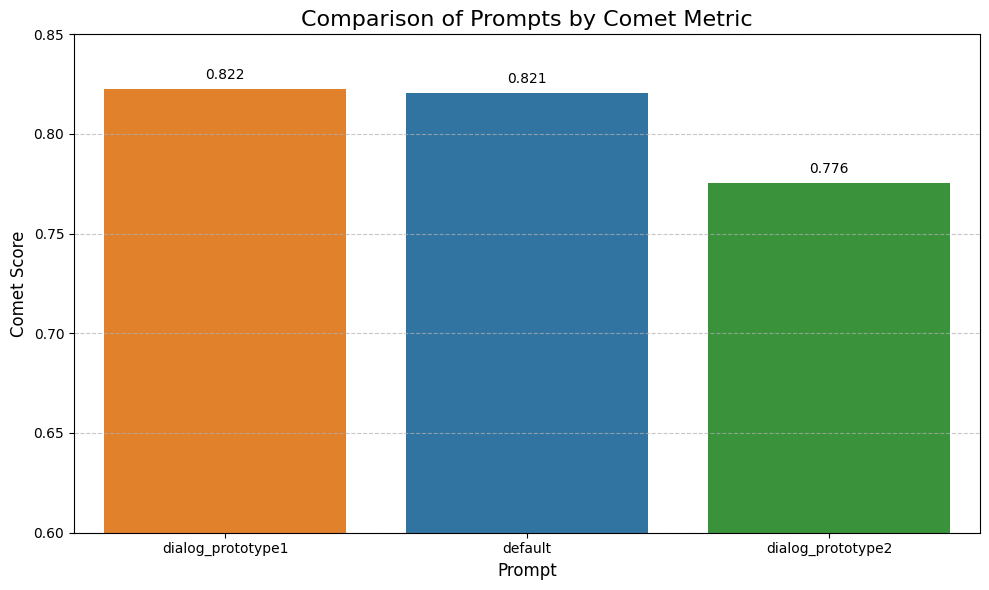

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2876041445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


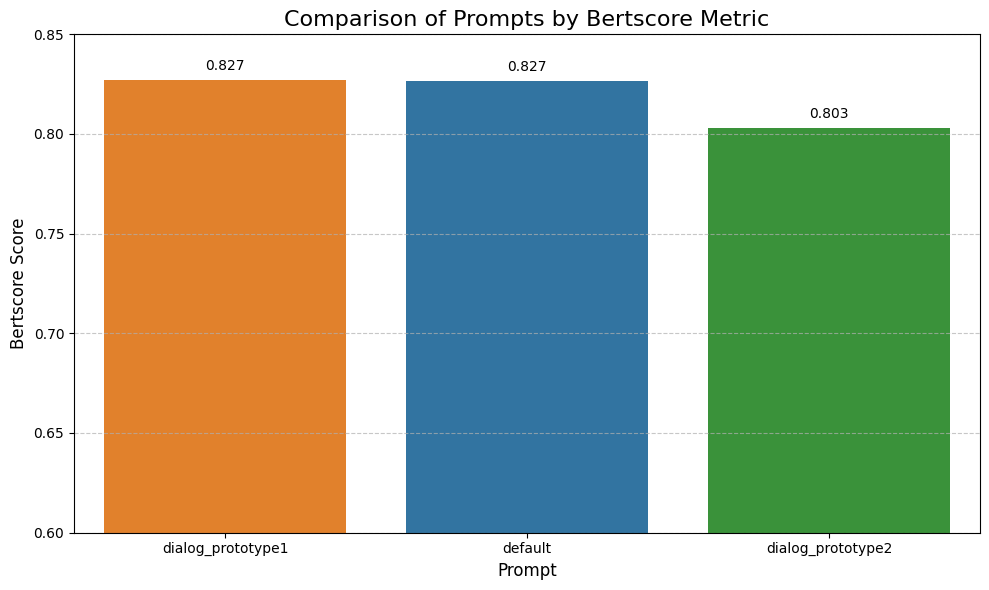

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2876041445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


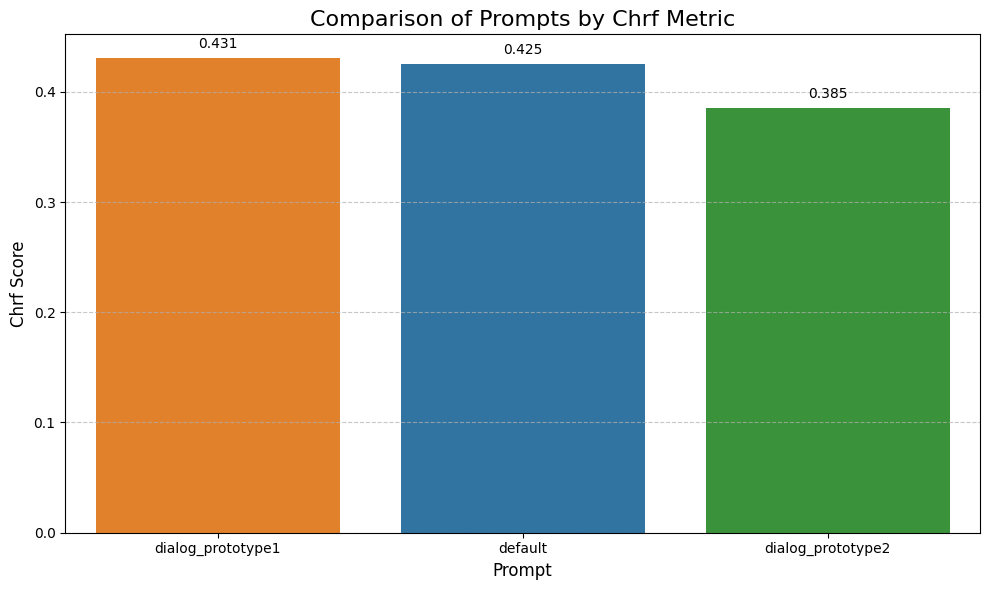

C:\Users\kajet\AppData\Local\Temp\ipykernel_14884\2876041445.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


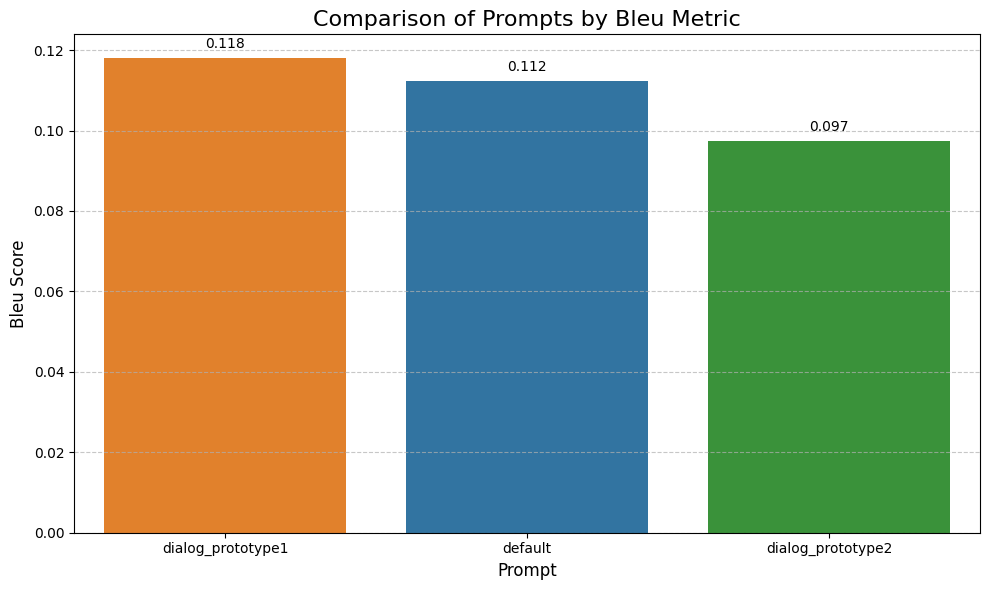

In [9]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv5.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv5.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparisonv5[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
dialog_prototype_comparisonv5 = pd.read_csv("translations_scores/dialog_prototype_experimentsv5.csv")

In [6]:
sorted_df = dialog_prototype_comparisonv5.sort_values(by='comet_dialog_prototype1', ascending=True)
top_5_lowest = sorted_df.head(30)
result = top_5_lowest[['comet_dialog_prototype1', 'dialog_prototype1', 'dialog_prototype2', 'default','en_text', 'pl_text']]
result

,comet_dialog_prototype1,dialog_prototype1,dialog_prototype2,default,en_text,pl_text
621,0.282839,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie przechodzi przez miasto...,Wee Willie Winkie runs through the town…,"Warzyła sroczka kaszkę, warzyła..."
1536,0.284219,Tylko w nawiasach kwadratowych:,Tylko w nawiasach kwadratowych:,"Za rogiem, w porcie Nowigradu. A dla twojego d...","Just round the corner, in Novigrad's port. And...","Za rogiem, w novigradzkim porcie... Obyś zasta..."
560,0.342712,Nic nie równa się czarodziejowi.,Nic nie może się równać z czarodziejem.,Nic takiego jak wiedźmin.,Nothin' quite like a witcher.,Wiedźmin to jednak wiedźmin.
391,0.348439,Cholera jasna!,Cholera jasna! Będą nas wystrzeliwać jak kaczki!,Jasny szlag!,Fuckin' hell!,Kurwa mać!
1197,0.352099,Do usług.,Na twoje usługi.,Do Państwa dyspozycji.,At your service.,Kłaniam się.
985,0.352447,Podobno mam jechać stąd boginkę.,Miałem jechać stąd z boginką.,Miało być?,Supposed to?,Miałeś?
790,0.352895,Ale prawie i ci skelligijscy barbarzyńcy by na...,Ale włos od śmierci i mieliby nas ci skelligij...,"Prawda. Ale o włos, a ci skelligijscy barbarzy...",True. But a hair's breadth and those Skellige ...,"Racja. Niewiele brakowało, a wpadlibyśmy w łap..."
1113,0.354982,Jedna główna wirtualna broń!,Eine glav'echen virti adem!,Jedna główna wirtualna masa!,Eine glav'echen virti adem!,Eine glav'echen virti adem!
1069,0.358366,Pada cały czas.,Pada cały czas.,"Padać będzie, ile zechcesz.",Rain all you will.,A niech sobie leje.
1453,0.389037,"Tak, jeden.","Tutaj. Tylko trzymaj się z dala od widoku, co?...","Tutaj. Po prostu trzymaj się z dala, co? Okrop...","Here. Just stay outta sight, eh? Awful bashful...","Masz. Jeno nie właź nikomu w oczy, bo te aktor..."


In [9]:
dialog_prototype_comparisonv5['diff'] = (
    dialog_prototype_comparisonv5['comet_dialog_prototype1'] - dialog_prototype_comparisonv5['comet_default']
)

# Sort by the difference in descending order
sorted_diff = dialog_prototype_comparisonv5.sort_values(by='diff', ascending=False)

# Select top N rows with the biggest difference
top_diff = sorted_diff.head(30)

# Display relevant columns
result = top_diff[['comet_dialog_prototype1', 'comet_default', 'diff', 'dialog_prototype1', 'default', 'en_text', 'pl_text']]
result

,comet_dialog_prototype1,comet_default,diff,dialog_prototype1,default,en_text,pl_text
1067,0.966059,0.398189,0.567870,"Byc'hane, gvyn, caeffyl!","Tłumaczenie:\r\n\r\nByć kobietą, pięknem, miło...","Byc'hane, gvyn, caeffyl!","Byc’hane, gvyn, caeffyl!"
967,0.984519,0.476617,0.507902,Ukłon.,Łuk.,Bow.,Ukłon.
913,0.986187,0.500083,0.486103,"Dobrze, babciu.","W porządku, granica.","All right, gran.","Dobrze, babciu."
655,0.961951,0.517990,0.443962,Łowcy! Łowcy nadchodzą!,Myśliwi! Myśliwi nadchodzą!,Hunters! Hunters approaching!,Łowcy! Łowcy idą!
1966,0.952233,0.547982,0.404251,Noooooooooo!,Nie mogę dodać samego tłumaczenia bez kontekst...,Noooooooooo!,Nieeeeeeee!
70,0.917269,0.527615,0.389654,"Interesy idą dobrze, nawet bez barona.","Biznes idzie dobrze, nawet z baronem odszedł.","Business seems good, even with the baron gone.",Nawet bez Barona interes kwitnie.
1548,0.725608,0.346777,0.378831,Ale ja nie gram. Ja pomagam.,Ale ja nie gram. Pomagam.,But I'm not playin'. I'm helpin'.,"Ja się nie bawię, ja pomagam."
524,0.914111,0.567285,0.346826,Czytasz mi w myślach znowu?,Czytając w moich myślach ponownie?,Reading my mind again?,Znów czytasz mi w myślach?
487,0.985771,0.668509,0.317262,Idę!,Nadchodzę!,Coming!,Idę!
1710,0.904459,0.595675,0.308784,Cyanatad... Niewid... Cywir...,Cianiad... Nie widzę... Cywir...,Caniatad… Nevid… Cyvir…,Caniatad... Nevid... Cyvir...


In [10]:
dialog_prototype_comparisonv5['diff'] = (
    dialog_prototype_comparisonv5['bleu_dialog_prototype1'] - dialog_prototype_comparisonv5['bleu_default']
)

# Sort by the difference in descending order
sorted_diff = dialog_prototype_comparisonv5.sort_values(by='diff', ascending=False)

# Select top N rows with the biggest difference
top_diff = sorted_diff.head(30)

# Display relevant columns
result = top_diff[['bleu_dialog_prototype1', 'bleu_default', 'diff', 'dialog_prototype1', 'default', 'en_text', 'pl_text']]
result

,bleu_dialog_prototype1,bleu_default,diff,dialog_prototype1,default,en_text,pl_text
897,1.000000,0.000000,1.000000,To ma być silny cios?,Nazwij to silnym ciosem?,Call that a strong blow?,To ma być silny cios?
1779,1.000000,0.052312,0.947688,Nie mogę się na to zgodzić.,Nie zgadzam się z tym.,Can't agree to that.,Nie mogę się na to zgodzić.
1323,1.000000,0.105737,0.894263,Co tu się stało?,Co się tutaj stało?,What happened here?,Co tu się stało?
1586,1.000000,0.105737,0.894263,Co tu się stało?,Co się tutaj stało?,What happened here?,Co tu się stało?
729,1.000000,0.125743,0.874257,Milcz! Nie będę tolerował nekromancji!,Cisza! Nie będę tolerować nekromancji!,Silence! I'll not tolerate necromancy!,Milcz! Nie będę tolerował nekromancji!
1738,1.000000,0.397635,0.602365,Jeszcze mnie nie zabiłeś.,Jeszcze mnie nie zabiło.,Haven't killed me yet.,Jeszcze mnie nie zabiłeś.
1387,1.000000,0.397635,0.602365,"Dzięki za pomoc, Geralt.","Dziękuję za pomoc, Geralt.","Thanks for your help, Geralt.","Dzięki za pomoc, Geralt."
945,0.562341,0.000000,0.562341,Może innym razem.,"Kiedy indziej, może.","Some other time, maybe.",Może innym razem.
788,0.547518,0.000000,0.547518,Spadaj. Nic więcej nie wiem.,Spadaj. Nie wiem nic innego.,Sod off. Don't know nothin' else.,Odwal się. Nic więcej nie wiem.
736,0.668740,0.125743,0.542997,Przestań! Nie chcę tego słuchać!,Stop! Nie będę tego słuchać!,Stop! I will not hear this!,Nie chcę tego słuchać!


In [30]:
sorted_df = dialog_prototype_comparisonv5.sort_values(by='comet_dialog_prototype1', ascending=True)
top_5_lowest = sorted_df.tail(30)
result = top_5_lowest[['comet_dialog_prototype1', 'dialog_prototype1', 'dialog_prototype2', 'default','en_text', 'pl_text']]
result

,comet_dialog_prototype1,dialog_prototype1,dialog_prototype2,default,en_text,pl_text
1795,0.992915,Ładne konie...,Muszą być warte więcej niż cała wieś.,Ładne góry...,Nice mounts…,Ładne konie...
203,0.993009,Szybko!,Szybko!,Szybko!,Quick!,Szybko!
1709,0.993334,"Mów za siebie, Olav!","Mów za siebie, Olav!","Mów za siebie, Olav!","Speak for yourself, Olav!","Mów za siebie, Olav!"
971,0.993368,Keira? Gdzie...?,Keira? Gdzie...?,Keira? Gdzie...?,Keira? Where…?,Keira? Gdzie...?
338,0.993512,Widziałem martwych ludzi...,Widziałem martwych ludzi...,Widziałem martwych ludzi...,Saw some dead folk…,Widziałem martwych ludzi...
1628,0.993545,Kurwa!,Kurwa!,Kurwa!,Fuck!,Kurwa!
359,0.993589,Ile masz lat?,Ile masz lat?,Ile masz lat?,How old're you?,Ile masz lat?
668,0.993764,Co?,Co?,Co?,Wha?,Co?
1475,0.993783,Masz kogoś konkretnego na myśli?,Czy masz kogoś konkretnego na myśli?,Masz kogoś konkretnego na myśli?,Got anyone specific in mind?,Masz kogoś konkretnego na myśli?
206,0.993802,Idziemy?,Idziemy?,Idziemy?,We going?,Idziemy?


In [3]:
system_dialog_prototype_comparisonv6 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv6.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_3004\2745671084.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


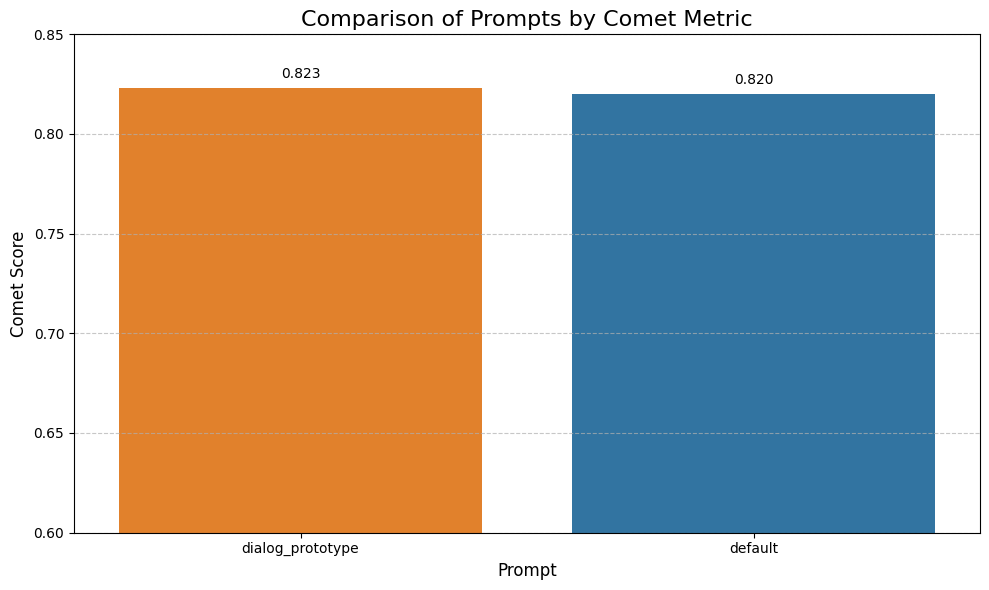

C:\Users\kajet\AppData\Local\Temp\ipykernel_3004\2745671084.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


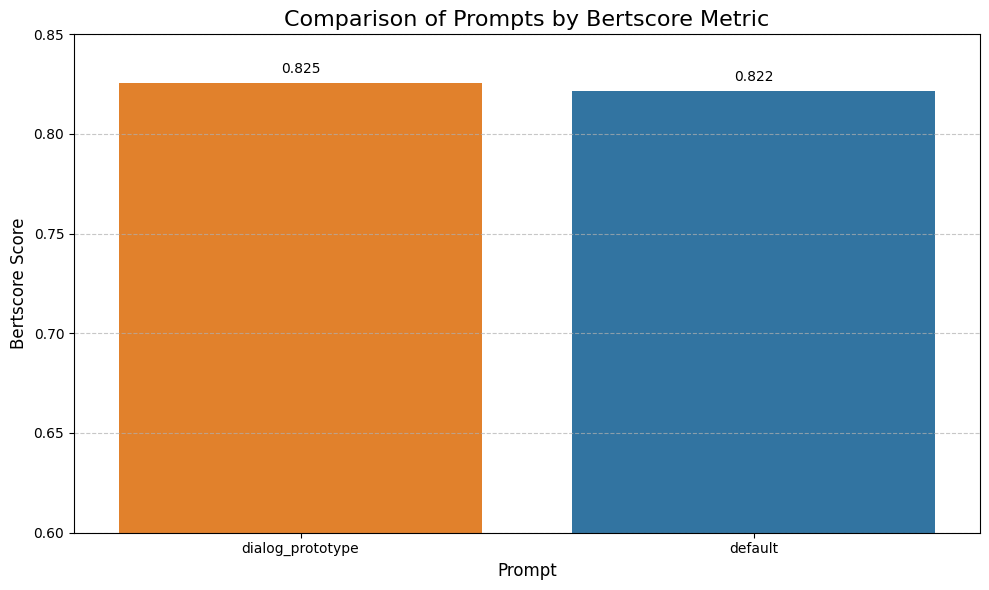

C:\Users\kajet\AppData\Local\Temp\ipykernel_3004\2745671084.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


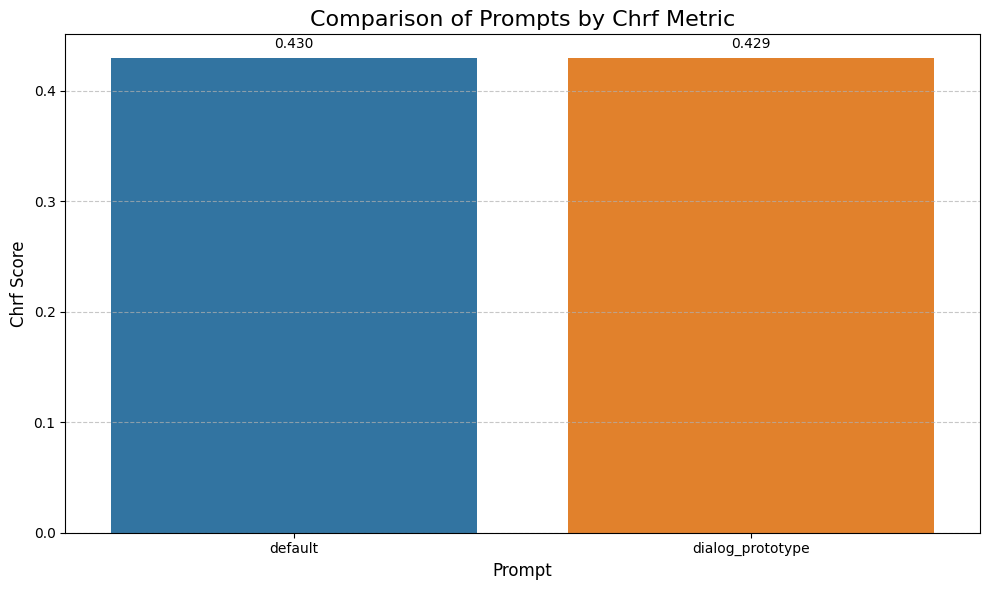

C:\Users\kajet\AppData\Local\Temp\ipykernel_3004\2745671084.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


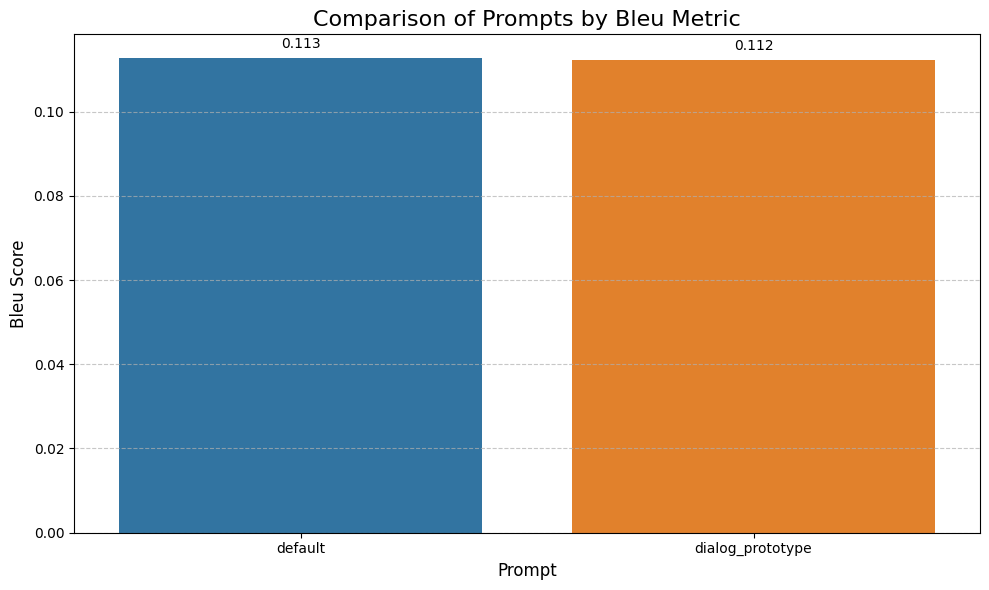

In [4]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv6.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_dialog_prototype_comparisonv6.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_dialog_prototype_comparisonv6[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
dialog_prototype_comparisonv6 = pd.read_csv("translations_scores/dialog_prototype_experimentsv6.csv")

In [6]:
sorted_df = dialog_prototype_comparisonv6.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(20)
result = top_5_lowest[['comet_dialog_prototype', 'dialog_prototype', 'default','en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,default,en_text,pl_text
805,0.231255,directly translated,"Strażnicy przekażą ciało, jeśli otrzymają odpo...",Guards'll hand over the body given the proper ...,Strażnicy na pewno wydadzą ciało... Jeśli się ...
1045,0.231951,ERROR,NaN,But there is more. My lieutenant demanded we d...,...to jeszcze nic. Mój porucznik kazał nam na ...
1671,0.255081,"Begone… Begone, vile power.",NaN,"Begone… Begone, vile power.","Odejdź... odejdź, siło nieczysta."
1102,0.270868,When man fall dead off horsie.,NaN,When man fall dead off horsie.,Kiedy komuś łeb odpadnie.
1341,0.282839,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie przechodzi przez miasto...,Wee Willie Winkie runs through the town…,"Warzyła sroczka kaszkę, warzyła..."
1252,0.317516,...,Morderca nie-ludzi. Znamy tego dżentelmena dob...,…A murderer of nonhumans. We know this gentlem...,...mordercą nieludzi. Ten jegomość jest nam zn...
1382,0.337581,ERROR,NaN,I heard.,Słyszałem.
722,0.359633,Nic nie może się równać z czarodziejem.,Nic takiego jak wiedźmin.,Nothin' quite like a witcher.,Wiedźmin to jednak wiedźmin.
569,0.375100,W porządku. Kucie i młotkowanie nie zrobi się ...,W porządku. Kucie i wbijanie nie zrobi się samo.,All right. Forgin' and hammerin' won't do itself.,Muszę wracać do pracy.
238,0.387390,Wilki zostawią krukom truchła jedne na drugich.,Wilki zostawią ciało wrony na ciele wrony.,Wolves will leave crows corpse upon corpse.,"Wilcy wylezą z lasu, trupy rozdziobie wrona."


In [10]:
system_dialog_prototype_comparisonv7 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv7.csv")
system_dialog_prototype_comparisonv7

,bleu_dialog_prototype,chrf_dialog_prototype,comet_dialog_prototype,bertscore_dialog_prototype
0,0.111143,0.427432,0.822042,0.8253


In [11]:
dialog_prototype_comparisonv7 = pd.read_csv("translations_scores/dialog_prototype_experimentsv7.csv")

In [18]:
sorted_df = dialog_prototype_comparisonv7.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(40)
result = top_5_lowest[['comet_dialog_prototype', 'dialog_prototype','en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
805,0.231255,directly translated,Guards'll hand over the body given the proper ...,Strażnicy na pewno wydadzą ciało... Jeśli się ...
1045,0.231951,ERROR,But there is more. My lieutenant demanded we d...,...to jeszcze nic. Mój porucznik kazał nam na ...
1671,0.255081,"Begone… Begone, vile power.","Begone… Begone, vile power.","Odejdź... odejdź, siło nieczysta."
1102,0.270868,When man fall dead off horsie.,When man fall dead off horsie.,Kiedy komuś łeb odpadnie.
1341,0.282839,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie runs through the town…,"Warzyła sroczka kaszkę, warzyła..."
722,0.359633,Nic nie może się równać z czarodziejem.,Nothin' quite like a witcher.,Wiedźmin to jednak wiedźmin.
1845,0.372161,"Co z tego? Nawet jeśli zaatakowałbym, wyciął i...",The local Nilfgaardian garrison - doesn't look...,Ten nilfgaardzki garnizon nie jest zbyt silny.
569,0.377016,Wszystko w porządku. Kucie i młotkowanie nie z...,All right. Forgin' and hammerin' won't do itself.,Muszę wracać do pracy.
238,0.387390,Wilki zostawią krukom truchła jedne na drugich.,Wolves will leave crows corpse upon corpse.,"Wilcy wylezą z lasu, trupy rozdziobie wrona."
874,0.387895,"Szary stary włóczęga, ale masz pięść ze skały.","Gray old vagrant, but you got a fist of stone.","Niby przybłęda, a bić się potrafi."


In [29]:
sorted_df = dialog_prototype_comparisonv7.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.tail(40)
result = top_5_lowest[['comet_dialog_prototype', 'dialog_prototype','en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
296,0.992032,Broń! Broń!,Weapon! Weapon!,Broń! Broń!
1086,0.992211,Zależy... od pytania.,Depends… on the question.,Zależy... od pytania.
1082,0.992321,"Wszystko gotowe, możemy ruszać.","Everything's ready, we can go.","Wszystko gotowe, możemy ruszać."
1450,0.992426,Co to znaczy?,What's that mean?,Co to znaczy?
550,0.992574,Hjalmar! Hjalmar!,Hjalmar! Hjalmar!,Hjalmar! Hjalmar!
1132,0.992595,Hm?,Hm?,Hm?
1647,0.992595,Hm?,Hm?,Hm?
1088,0.992864,Co tu się stało?,What happened here?,Co tu się stało?
1374,0.992928,Svalblod!,Svalblod!,Svalblod!
790,0.992968,Co to było?,What was that?,Co to było?


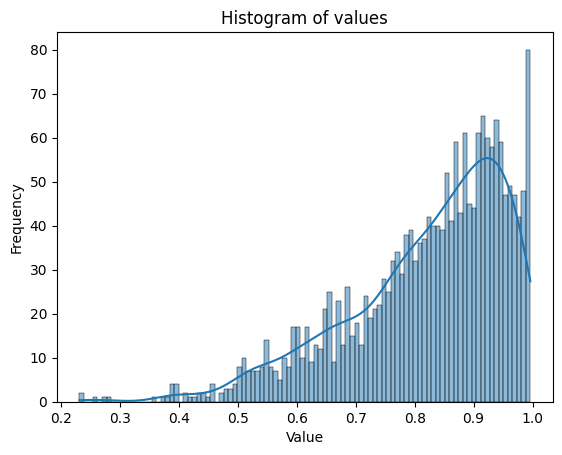

In [28]:
import seaborn as sns

sns.histplot(dialog_prototype_comparisonv7['comet_dialog_prototype'], bins=100, kde=True)  # Set kde=True for a density curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of values')
plt.show()

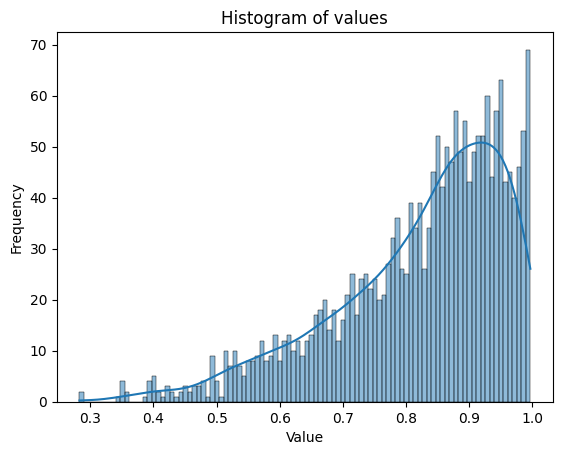

In [26]:
import seaborn as sns

sns.histplot(dialog_prototype_comparisonv5['comet_dialog_prototype1'], bins=100, kde=True)  # Set kde=True for a density curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of values')
plt.show()

In [31]:
system_dialog_prototype_comparisonv8 = pd.read_csv("translations_scores/system_dialog_prototype_experimentsv8.csv")
system_dialog_prototype_comparisonv8

,bleu_dialog_prototype,chrf_dialog_prototype,comet_dialog_prototype,bertscore_dialog_prototype
0,0.119083,0.42618,0.821479,0.825715


In [32]:
dialog_prototype_comparisonv8 = pd.read_csv("translations_scores/dialog_prototype_experimentsv8.csv")

In [33]:
sorted_df = dialog_prototype_comparisonv8.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.tail(40)
result = top_5_lowest[['comet_dialog_prototype', 'dialog_prototype','en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
511,0.992286,A kim była Czwarta?,And the Fourth - who were she?,A kim była Czwarta?
1082,0.992322,"Wszystko gotowe, możemy ruszać.","Everything's ready, we can go.","Wszystko gotowe, możemy ruszać."
1450,0.992426,Co to znaczy?,What's that mean?,Co to znaczy?
334,0.992433,Chodź!,Come!,Chodź!
550,0.992574,Hjalmar! Hjalmar!,Hjalmar! Hjalmar!,Hjalmar! Hjalmar!
1647,0.992595,Hm?,Hm?,Hm?
1132,0.992595,Hm?,Hm?,Hm?
1244,0.992864,Co tu się stało?,What happened here?,Co tu się stało?
1088,0.992864,Co tu się stało?,What happened here?,Co tu się stało?
1374,0.992928,Svalblod!,Svalblod!,Svalblod!


In [36]:
sorted_df = dialog_prototype_comparisonv8.sort_values(by='comet_dialog_prototype', ascending=True)
top_5_lowest = sorted_df.head(40)
result = top_5_lowest[['comet_dialog_prototype', 'dialog_prototype','en_text', 'pl_text']]
result

,comet_dialog_prototype,dialog_prototype,en_text,pl_text
805,0.231255,directly translated,Guards'll hand over the body given the proper ...,Strażnicy na pewno wydadzą ciało... Jeśli się ...
1045,0.231951,ERROR,But there is more. My lieutenant demanded we d...,...to jeszcze nic. Mój porucznik kazał nam na ...
1671,0.255081,"Begone… Begone, vile power.","Begone… Begone, vile power.","Odejdź... odejdź, siło nieczysta."
1102,0.270868,When man fall dead off horsie.,When man fall dead off horsie.,Kiedy komuś łeb odpadnie.
1341,0.282839,Wee Willie Winkie biegnie przez miasto...,Wee Willie Winkie runs through the town…,"Warzyła sroczka kaszkę, warzyła..."
569,0.319528,W porządku. Kucie i młotkowanie samo się nie z...,All right. Forgin' and hammerin' won't do itself.,Muszę wracać do pracy.
232,0.334657,ERROR,"You, there! Outside the door! Geralt - that ri...","A ty tam, a drzwiami... Geralt? Dobrze mówię?"
722,0.342712,Nic nie równa się czarodziejowi.,Nothin' quite like a witcher.,Wiedźmin to jednak wiedźmin.
1095,0.352895,Ale prawie i ci skelligijscy barbarzyńcy by na...,True. But a hair's breadth and those Skellige ...,"Racja. Niewiele brakowało, a wpadlibyśmy w łap..."
1845,0.359864,"Co z tego? Gdybym zaatakował, wyciął ich wszys...",The local Nilfgaardian garrison - doesn't look...,Ten nilfgaardzki garnizon nie jest zbyt silny.
